# CLUSTERING OF B CELLS
## SID GURAJALA
## 08/24/2023

## READ IN LIBRARIES

In [3]:
library(symphony)
library(dplyr)
library(ggplot2)
library(tidyr)
library(viridis)
library(stringr)
library(pheatmap)
library(ggrepel)
library(presto)
library(pals)
library(Seurat)
library(harmony)
library(singlecellmethods)
library(lisi)
source("/data/srlab/ik936/Foxxy/utils/utils.R")
source("/data/srlab/anathan/scripts/scseq_utils.R")
library(parallel)
set.seed(0)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Loading required package: viridisLite

Loading required package: Rcpp

Loading required package: data.table


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘pals’


The following objects are masked from ‘package:viridis’:

    cividis, inferno, magma, plasma, turbo, viridis


The following objects are masked from ‘package:viridisLite’:

    cividis, inferno, magma, plasma, turbo, viridis


Attaching SeuratObject


Attaching package: ‘singlecellmethods’


The following object is masked from ‘package:SeuratObject’:

    rowMeans


The following objects are masked from ‘package:symphony’:

    findVariableGenes, rowSDs, scaleDataWithStats, vargenes_vst


The following object is masked from ‘package:bas

In [2]:
all_obj <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/demux_cell_qcd_gex_seurat_sc_analysis_08232023.rds')

In [6]:
all_obj <- DietSeurat(all_obj)
all_obj <- subset(all_obj, subset = broad.ids %in% c('B Cell'))

## TECHNICAL CLUSTERING

### VARIABLE GENES, SCALING, PCA

In [7]:
VariableFeatures(all_obj) <- NULL

In [8]:
all_obj <- FindVariableFeatures(all_obj, selection.method = "vst", nfeatures = 2500)

In [9]:
all_obj <- ScaleData(all_obj)

Centering and scaling data matrix



In [10]:
all_obj <- RunPCA(all_obj, features = VariableFeatures(object = all_obj))

PC_ 1 
Positive:  TCL1A, CXCR4, IGHM, IGHD, FOXP1, BTG1, IL4R, YBX3, FCER2, VPREB3 
	   LTB, BIRC3, TAPT1, BACH2, NIBAN3, CD69, TXNIP, PLPP5, COL19A1, ZBTB16 
	   GABPB1-AS1, CCR7, TP53INP1, TCL6, RPS2, BCL7A, AL139020.1, SELL, MT-ND3, H1FX 
Negative:  CRIP1, ITGAX, B2M, IFI30, NEAT1, IGHG1, IGHG3, ANXA2, SIGLEC6, EMP3 
	   ITGB1, CIB1, ZBTB32, S100A11, CLECL1, TNFRSF13B, TNFRSF1B, SCIMP, LGALS1, S100A10 
	   TFEC, AIM2, PLEK, HCST, COTL1, IGHA1, FGR, SOX5, CD86, ITGB7 
PC_ 2 
Positive:  LTB, COCH, AIM2, CD27, SSPN, TEX9, LINC01781, S100A10, MARCKS, RPLP1 
	   PVT1, LYPLAL1, TMEM273, COL4A4, HIPK2, GRAMD1C, CRIP2, HOMER3, BAIAP3, TAGLN2 
	   CPNE5, DAAM1, BTNL9, PDE4D, CD70, HSPA8, IFNG-AS1, RPS18, TNFRSF13B, GAPDH 
Negative:  IGHD, RGS2, ZEB2, MPP6, FCRL5, CEMIP2, BTG1, CLEC2D, ENC1, ZNF331 
	   DUSP1, JUNB, JUND, METRNL, CD72, NR4A2, FCRL3, ITGAX, SOX5, IGHM 
	   MAP3K8, CREM, TNFRSF1B, RHOB, YBX3, FGR, HSPB1, MACROD2, HCK, DUSP5 
PC_ 3 
Positive:  XAF1, IFI44L, MX1, IFIT3, IFIT1, SA

### HARMONY

use_weights



[1] FALSE


use_weights

use_weights



[1] FALSE


use_weights

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Warning message:
“did not converge in 25 iterations”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4187500)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


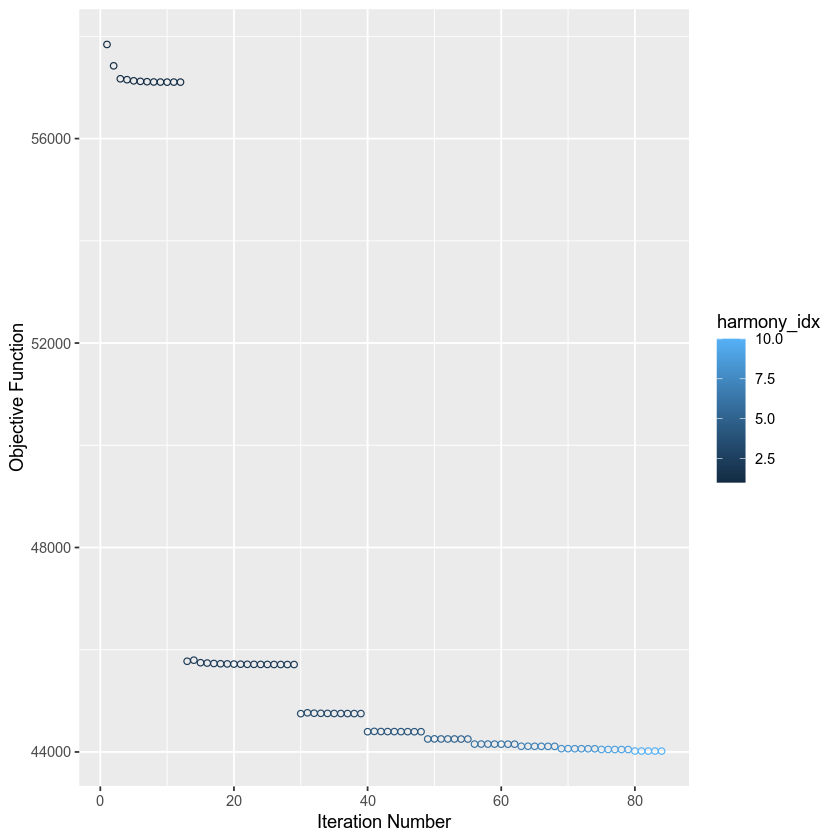

In [11]:
all_obj <- all_obj %>% 
                    RunHarmony(c("Batch", "Unified_Visit"), plot_convergence = TRUE)

### UMAP, CLUSTERING


In [12]:
all_obj <- RunUMAP(all_obj, reduction = "harmony", dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
03:21:19 UMAP embedding parameters a = 0.9922 b = 1.112

03:21:19 Read 83750 rows and found 20 numeric columns

03:21:19 Using Annoy for neighbor search, n_neighbors = 30

03:21:19 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

03:21:29 Writing NN index file to temp file /tmp/RtmpjRU9ug/file4c4a6cc76746

03:21:29 Searching Annoy index using 1 thread, search_k = 3000

03:22:12 Annoy recall = 100%

03:22:12 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [13]:
all_obj <- FindNeighbors(all_obj, reduction = "harmony", dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [14]:
all_obj <- FindClusters(all_obj, resolution = c(0.1, 0.25, 0.5, 0.75, 1.0))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83750
Number of edges: 1948180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9543
Number of communities: 6
Elapsed time: 35 seconds


1 singletons identified. 5 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83750
Number of edges: 1948180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9105
Number of communities: 12
Elapsed time: 35 seconds


1 singletons identified. 11 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83750
Number of edges: 1948180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8740
Number of communities: 17
Elapsed time: 34 seconds


1 singletons identified. 16 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83750
Number of edges: 1948180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8453
Number of communities: 18
Elapsed time: 33 seconds


1 singletons identified. 17 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83750
Number of edges: 1948180

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8227
Number of communities: 22
Elapsed time: 34 seconds


1 singletons identified. 21 final clusters.



In [15]:
saveRDS(DietSeurat(all_obj, scale.data = FALSE,
                      dimreducs	= c("pca", "harmony", "umap")),
                   '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/b_cell_seurat_sc_analysis_08242023.rds')

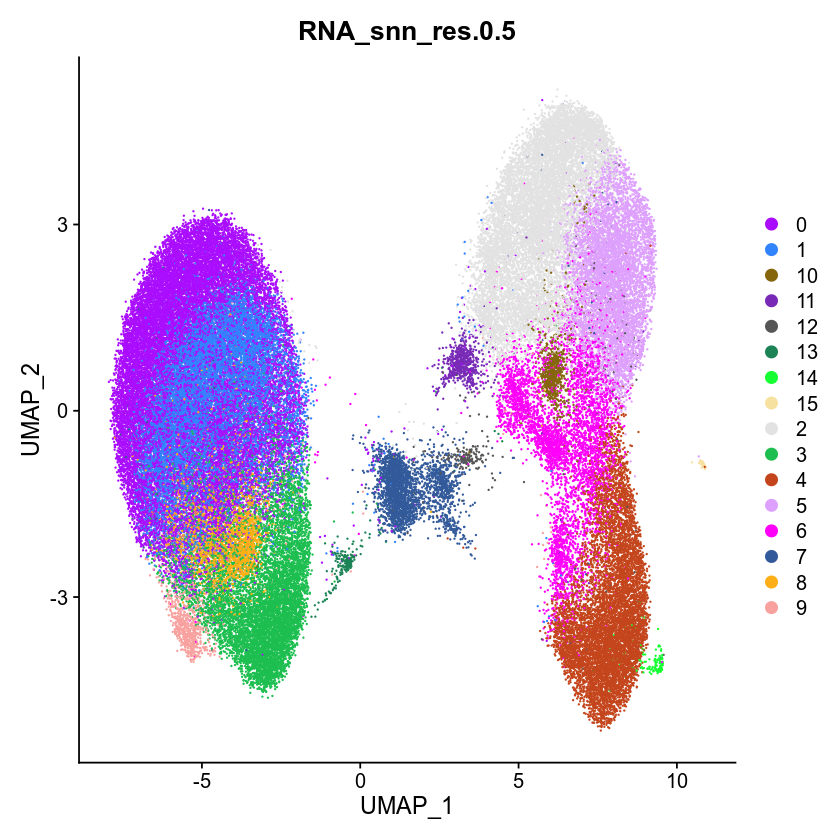

In [26]:
DimPlot(all_obj, group.by = "RNA_snn_res.0.25", cols = as.vector(alphabet2(26)))

In [34]:
subset_obj <- subset(all_obj, cells = Cells(all_obj)[sample(ncol(all_obj), 20000)])

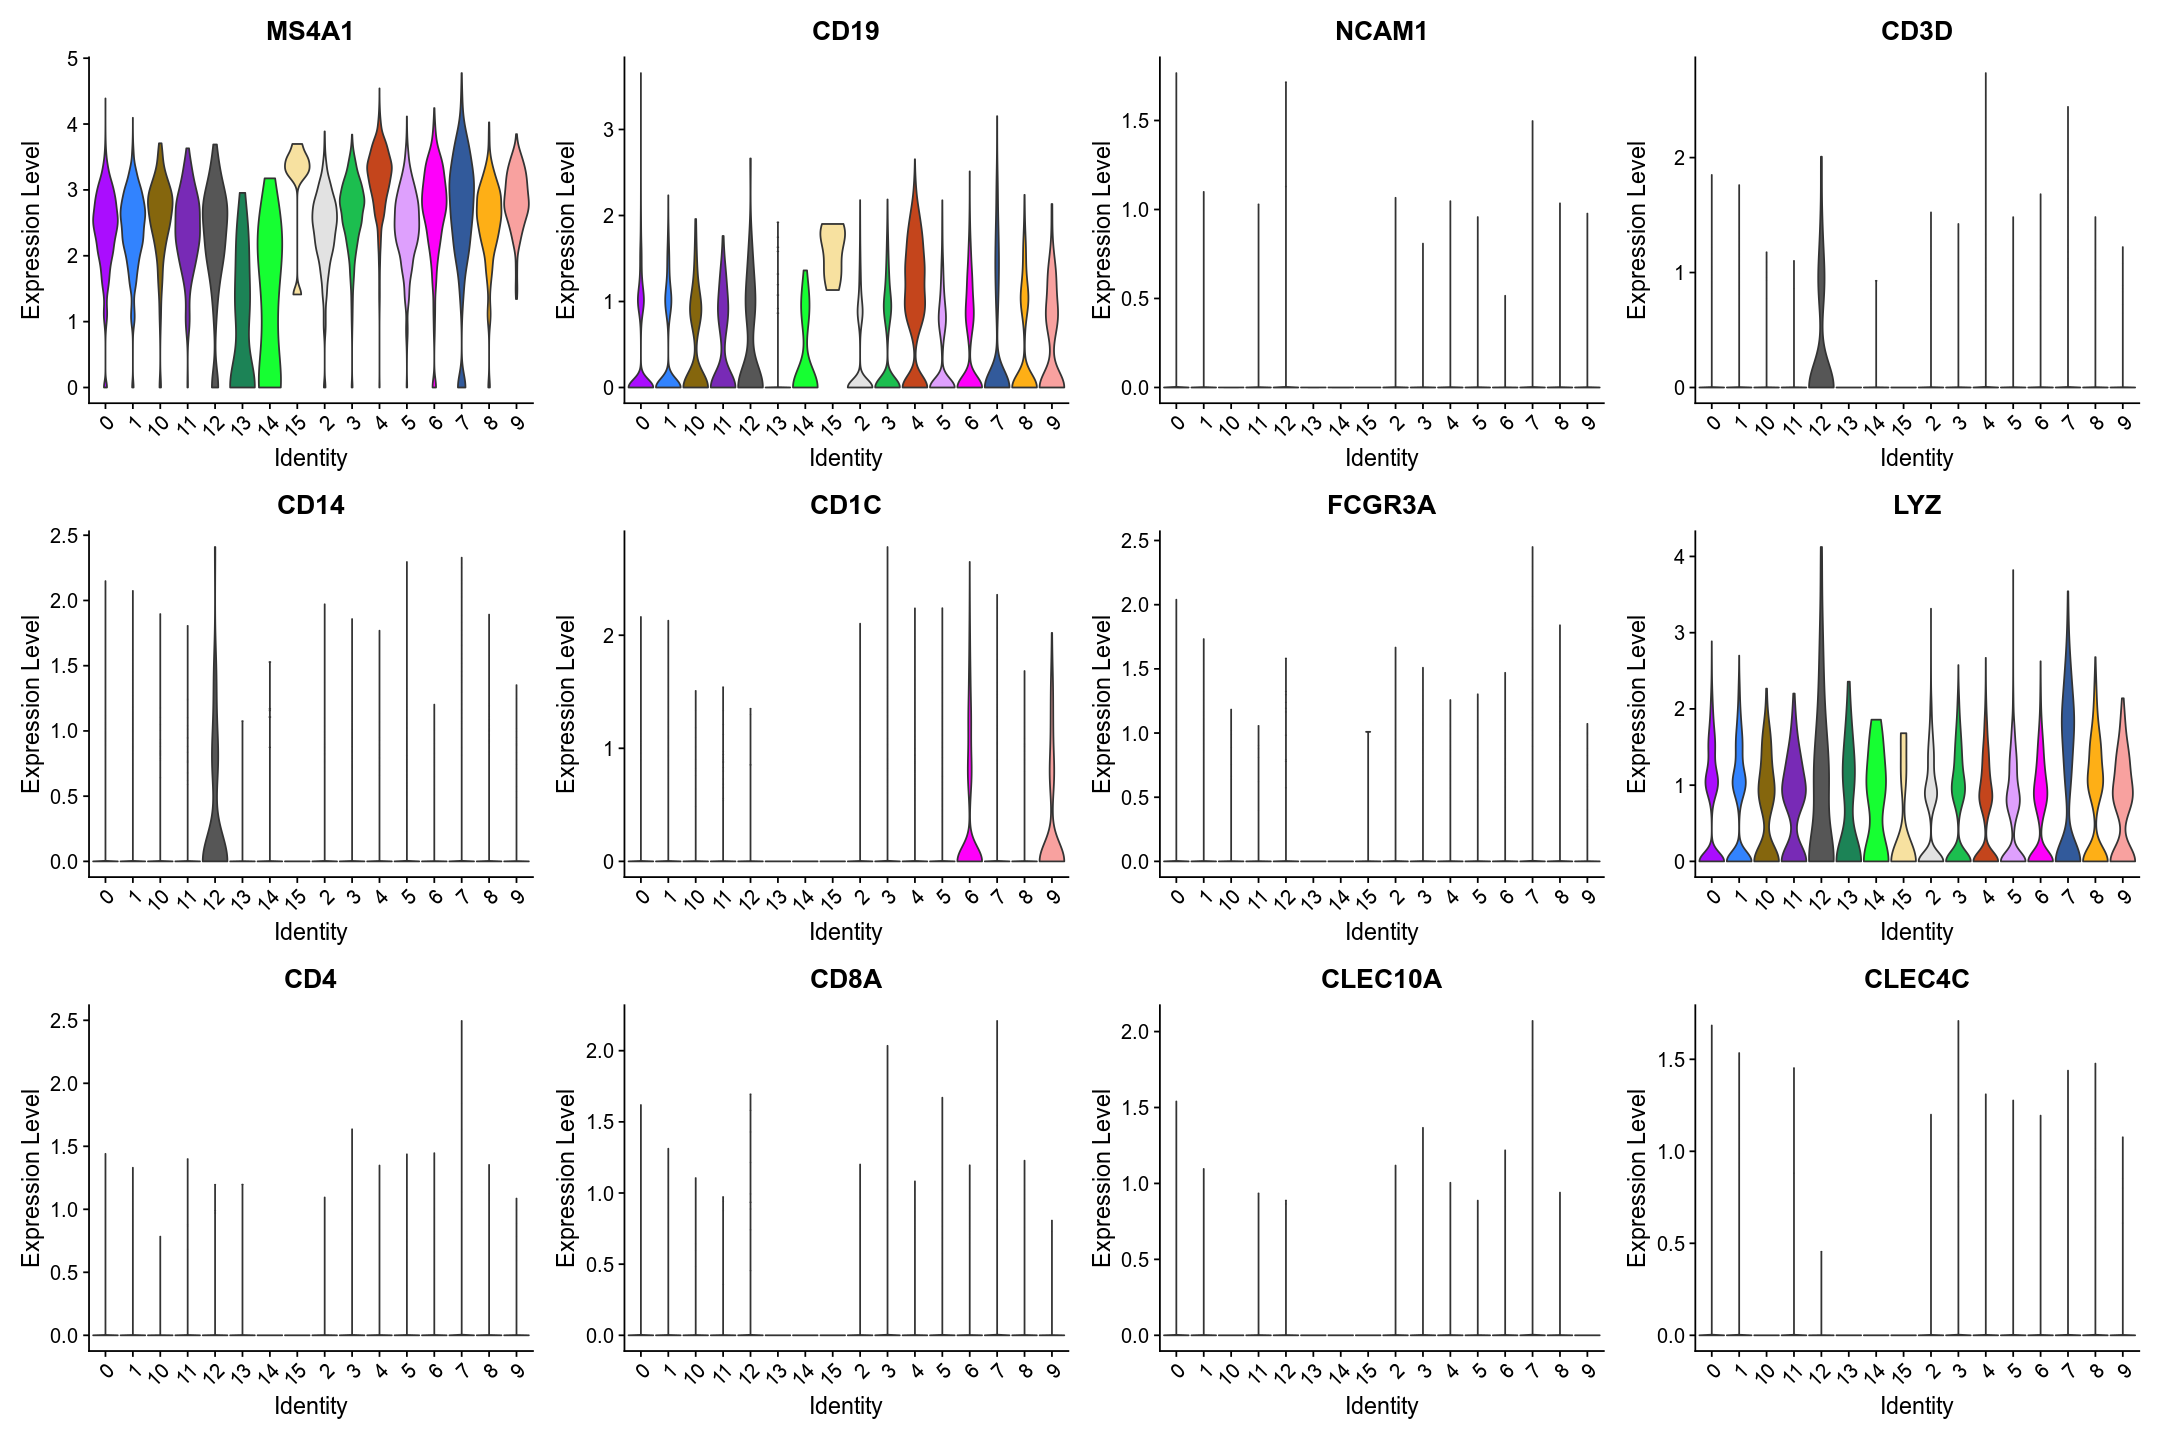

In [36]:
fig.size(12, 18)
VlnPlot(subset_obj,  features = c("MS4A1", "CD19", "NCAM1", "CD3D", 
                                     "CD14", "CD1C", "FCGR3A", 
                                     "LYZ", "CD4", "CD8A",
                                     "CLEC10A", "CLEC4C"), raster = FALSE,
         pt.size = 0, cols = as.vector(alphabet2(26)), group.by = 'RNA_snn_res.0.5')

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


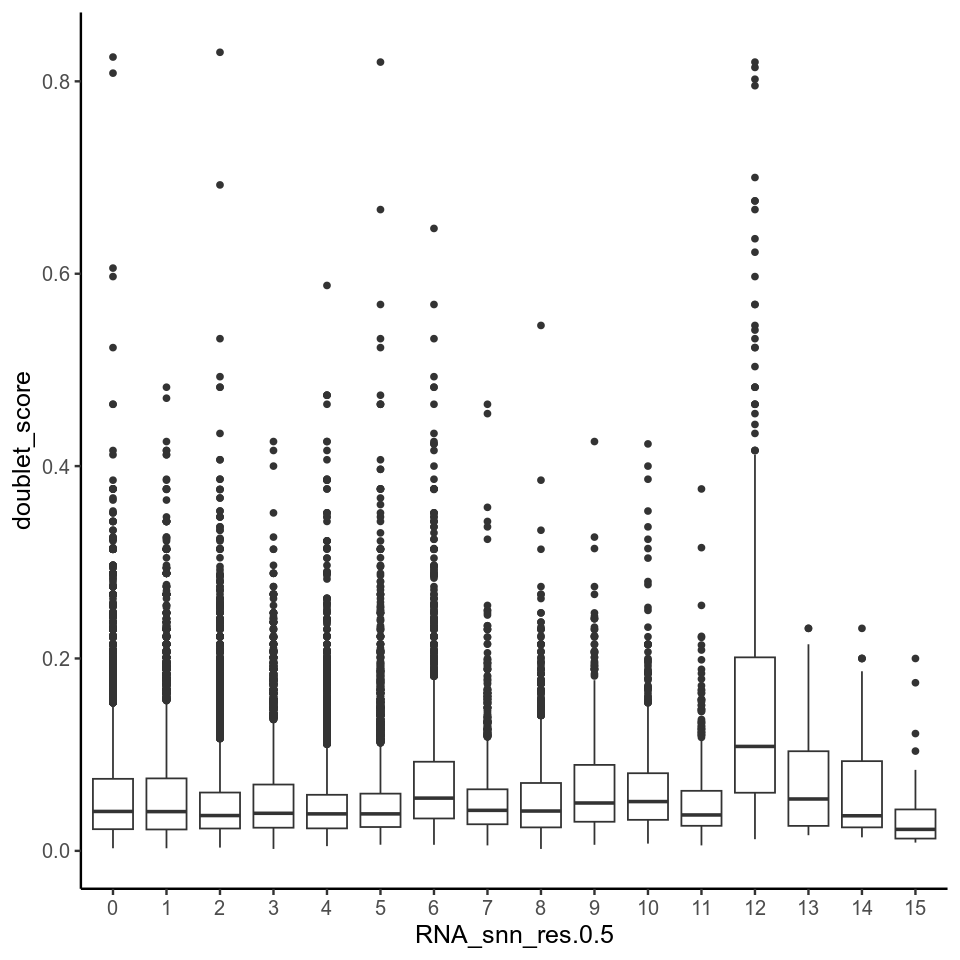

In [37]:
fig.size(8, 8)
ggplot(all_obj@meta.data, 
               aes(x = RNA_snn_res.0.5, y = doublet_score)) + 
    geom_boxplot() + 
    scale_x_discrete(limits = factor(0:15)) + 
    theme_classic(base_size = 15)

In [40]:
all_obj <- subset(all_obj, subset = RNA_snn_res.0.5 != 12)

## CELL STATE CLUSTERING

In [3]:
all_obj <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/b_cell_seurat_sc_analysis_08242023.rds')
all_obj <- subset(all_obj, subset = RNA_snn_res.0.5 != 12)

In [4]:
all_obj <- DietSeurat(all_obj, scale.data = FALSE)
VariableFeatures(all_obj) <- NULL

### VARIABLE GENES, SCALING, PCA

In [5]:
all_obj <- FindVariableFeatures(all_obj, selection.method = "vst", nfeatures = 2500)

In [6]:
all_obj <- ScaleData(all_obj)

Centering and scaling data matrix



In [7]:
all_obj <- RunPCA(all_obj, features = VariableFeatures(object = all_obj))

PC_ 1 
Positive:  CRIP1, ITGAX, B2M, IFI30, NEAT1, IGHG1, IGHG3, SIGLEC6, ANXA2, EMP3 
	   ITGB1, CIB1, ZBTB32, S100A11, CLECL1, TNFRSF13B, TNFRSF1B, SCIMP, LGALS1, S100A10 
	   TFEC, AIM2, PLEK, HCST, COTL1, IGHA1, FGR, SOX5, CD86, ITGB7 
Negative:  TCL1A, CXCR4, IGHM, IGHD, FOXP1, BTG1, IL4R, YBX3, FCER2, VPREB3 
	   LTB, BIRC3, TAPT1, BACH2, NIBAN3, CD69, TXNIP, PLPP5, COL19A1, ZBTB16 
	   GABPB1-AS1, CCR7, TP53INP1, TCL6, RPS2, BCL7A, AL139020.1, SELL, MT-ND3, H1FX 
PC_ 2 
Positive:  LTB, COCH, AIM2, CD27, SSPN, TEX9, LINC01781, S100A10, MARCKS, RPLP1 
	   PVT1, LYPLAL1, TMEM273, COL4A4, HIPK2, GRAMD1C, CRIP2, HOMER3, BAIAP3, TAGLN2 
	   CPNE5, DAAM1, PDE4D, BTNL9, CD70, IFNG-AS1, HSPA8, RPS18, TNFRSF13B, GAPDH 
Negative:  IGHD, RGS2, ZEB2, MPP6, FCRL5, CEMIP2, BTG1, CLEC2D, ENC1, ZNF331 
	   DUSP1, JUNB, JUND, METRNL, CD72, NR4A2, FCRL3, ITGAX, SOX5, IGHM 
	   MAP3K8, CREM, TNFRSF1B, RHOB, YBX3, FGR, HSPB1, HCK, MACROD2, SLC11A1 
PC_ 3 
Positive:  XAF1, IFI44L, MX1, IFIT3, IFIT1, 

### HARMONY

use_weights



[1] FALSE


use_weights

use_weights



[1] FALSE


use_weights

Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4172850)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4172850)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4172850)”
Warning message:
“Quick-TRANSfer stage steps exceeded maximum (= 4172850)”
Harmony 1/10

Harmony 2/10

Harmony 3/10

Harmony 4/10

Harmony 5/10

Harmony 6/10

Harmony 7/10

Harmony 8/10

Harmony 9/10

Harmony 10/10

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.RNA.harmony; see ?make.names for more details on syntax validity”


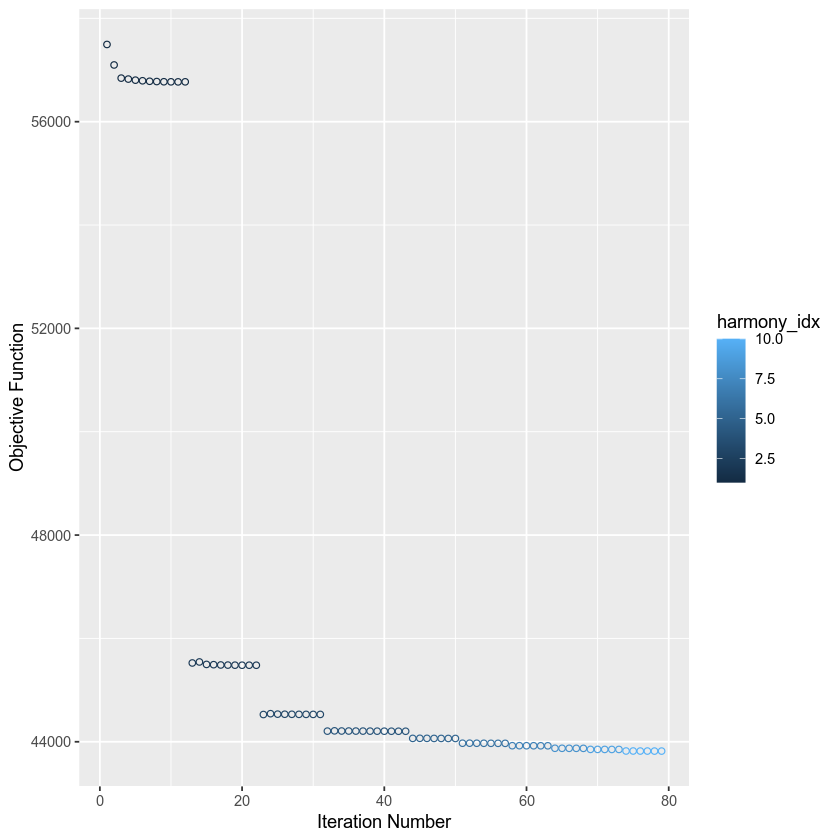

In [8]:
all_obj <- all_obj %>% 
                    RunHarmony(c("Batch", "Unified_Visit"), plot_convergence = TRUE)

### UMAP, CLUSTERING

In [9]:
all_obj <- RunUMAP(all_obj, reduction = "harmony", dims = 1:20)

Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”
18:29:26 UMAP embedding parameters a = 0.9922 b = 1.112

18:29:26 Read 83457 rows and found 20 numeric columns

18:29:26 Using Annoy for neighbor search, n_neighbors = 30

18:29:26 Building Annoy index with metric = cosine, n_trees = 50

0%   10   20   30   40   50   60   70   80   90   100%

[----|----|----|----|----|----|----|----|----|----|

*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
*
|

18:29:35 Writing NN index file to temp file /tmp/Rtmpwt3TBW/filebb312bd43946

18:29:35 Searching Annoy index using 1 thread, search_k = 3000

18:30:08 Annoy recall = 100%

18:30:08 Commencing smooth kNN distance calibration using 1 thread
 with target n_neighbors 

In [10]:
all_obj <- FindNeighbors(all_obj, reduction = "harmony", dims = 1:20)

Computing nearest neighbor graph

Computing SNN



In [11]:
all_obj <- FindClusters(all_obj, resolution = c(0.1, 0.25, 0.5, 0.75, 1.0))

Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83457
Number of edges: 1935364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9542
Number of communities: 11
Elapsed time: 24 seconds


4 singletons identified. 7 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83457
Number of edges: 1935364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9104
Number of communities: 13
Elapsed time: 32 seconds


4 singletons identified. 9 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83457
Number of edges: 1935364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8722
Number of communities: 17
Elapsed time: 30 seconds


4 singletons identified. 13 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83457
Number of edges: 1935364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8441
Number of communities: 21
Elapsed time: 30 seconds


4 singletons identified. 17 final clusters.



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 83457
Number of edges: 1935364

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.8209
Number of communities: 25
Elapsed time: 25 seconds


4 singletons identified. 21 final clusters.



In [12]:
saveRDS(DietSeurat(all_obj, scale.data = FALSE,
                      dimreducs	= c("pca", "harmony", "umap")),
                   '/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/b_cell_qcd_seurat_sc_analysis_08252023.rds')

## EXPORTING OBJECTS

In [1]:
all_obj <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/b_cell_qcd_seurat_sc_analysis_08252023.rds')

In [13]:
saveRDS(Embeddings(all_obj, reduction = "harmony"), '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_b_cell_pbmc_hPCs.rds')
saveRDS(Embeddings(all_obj, reduction = "umap"), '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_b_cell_pbmc_umap.rds')
saveRDS(all_obj@meta.data, '/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_b_cell_pbmc_metadata.rds')

## CELL STATE ASSIGNMENTS

In [4]:
de_res0.25 <- wilcoxauc(all_obj[['RNA']]@data, 
                       all_obj@meta.data$RNA_snn_res.0.25)

In [14]:
de_res0.25 %>% filter(feature == "CENPF")

feature,group,avgExpr,logFC,statistic,auc,pval,padj,pct_in,pct_out
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
CENPF,0,0.011973378,-0.0021147037,863781624,0.4981917,1.866390e-06,6.764208e-06,1.0153325,1.381172
CENPF,1,0.015146380,0.0026923505,638087354,0.5024619,2.781750e-08,1.375876e-07,1.5885703,1.090812
CENPF,2,0.008294105,-0.0055256020,392942769,0.4978964,1.828910e-04,6.432820e-04,0.8461326,1.264742
CENPF,3,0.021293211,0.0089478681,271047192,0.5040230,3.490582e-09,3.717160e-08,1.9468524,1.142371
CENPF,4,0.013256520,0.0001621356,112730438,0.4998508,8.872175e-01,1.000000e+00,1.1802575,1.211242
CENPF,5,0.013558139,0.0004724172,100429020,0.4981405,9.458580e-02,2.824455e-01,0.8433735,1.221485
CENPF,6,0.007455363,-0.0056887602,26832843,0.4985242,4.930334e-01,1.000000e+00,0.9230769,1.212458
CENPF,7,0.013539110,0.0004421864,22651048,0.5003611,8.777638e-01,1.000000e+00,1.2820513,1.209731
CENPF,8,0.000000000,-0.0131068839,1854045,0.4939457,4.577044e-01,1.000000e+00,0.0000000,1.210857


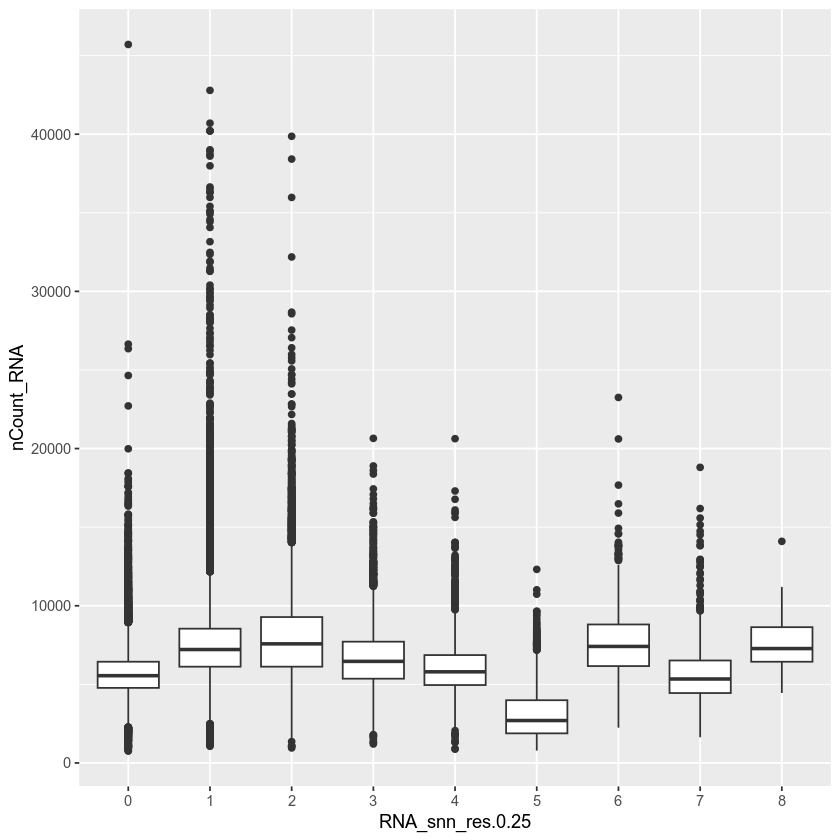

In [10]:
ggplot(all_obj@meta.data, aes(x = RNA_snn_res.0.25, y = nCount_RNA)) + 
    geom_boxplot()

In [48]:
pivot_wilcox_expr <- function(wilcox_obj) {
    df <- wilcox_obj %>% select(group, feature, avgExpr) %>% 
                    pivot_wider(names_from = 'feature', values_from = 'avgExpr') %>% data.frame()
    rownames(df) <- df$group
    df <- df %>% select(-group) %>% as.matrix()
    return(df)
}

pivot_wilcox_logFC <- function(wilcox_obj) {
    df <- wilcox_obj %>% select(group, feature, logFC) %>% 
                    pivot_wider(names_from = 'feature', values_from = 'logFC') %>% data.frame()
    rownames(df) <- df$group
    df <- df %>% select(-group) %>% as.matrix()
    return(df)
}

In [91]:
annotations <- data.frame(group = as.character(seq(0, 8)),
                          annotation = c("B0. CXCR5high Naive",
                                         "B1. CRIP1+ Mature",
                                         "B2. FCRL5+ ITGAX+ ABC",
                                         "B3. CD79A+ VREPB3+ pre B Cell",
                                         "B4. ISGhigh Naive",
                                         "B5. MThigh",
                                         "B6. JUN+ NFKB1+ Activated",
                                         "B7. IGKC+ XBP1+ Plasma-like", 
                                         "B8. FCRL5+ ITGAX+ ABC"))

In [93]:
filter_genes <- c("IGHM", "IGHD", "IGHA1", "IGHG1",
                  "CD19", "MS4A1", "CXCR5", "CRIP1",
                  "FCRL5", "ITGAX", "CD79A", "VPREB3",
                  "ISG15", "IFI44L", "JUN", "NFKB1",
                  "IGKC", "XBP1")

In [94]:
plot_df <- pivot_wilcox_expr(de_res0.25 %>% 
                                    left_join(annotations) %>% select(-group) %>% 
                                    rename(group = annotation) %>% filter(feature %in% filter_genes))

Joining, by = "group"


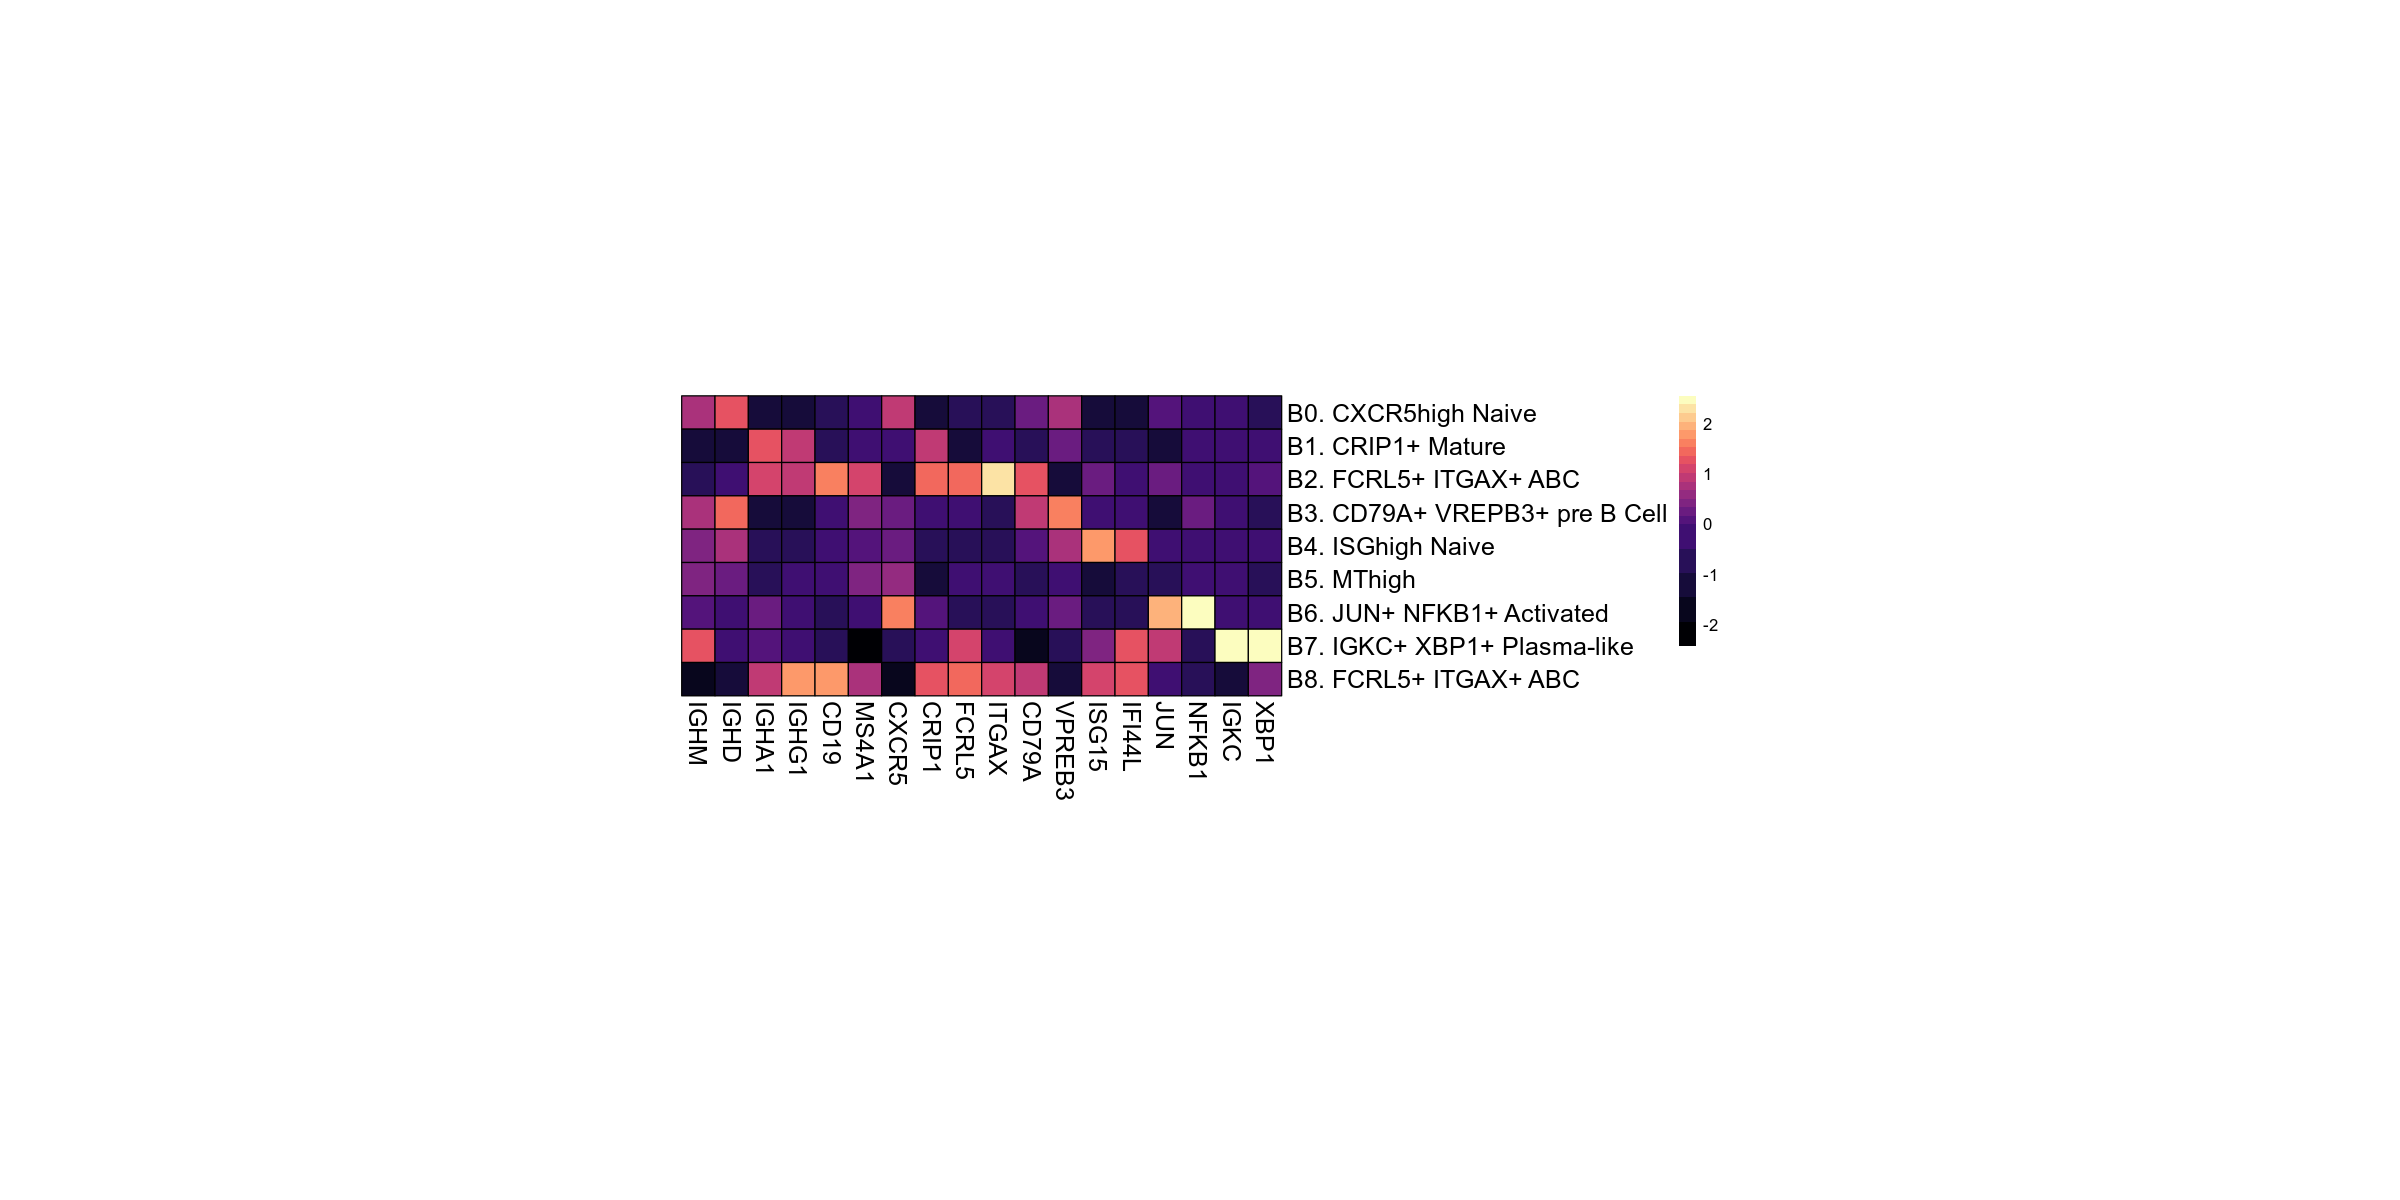

In [95]:
fig.size(10, 20)
pheatmap(scale(plot_df[annotations$annotation, filter_genes]),
        scale = "none", cluster_rows = FALSE, cluster_cols = FALSE,
      #  color=c(colorRampPalette(c("purple", "black"))(10),  colorRampPalette(c("black", "yellow"))(10)), 
        color = magma(20),
        breaks = c(seq(min(scale(plot_df)), 0, abs(min(scale(plot_df))) / 5), 
                   seq(0, abs(max(scale(plot_df))), abs(max(scale(plot_df))) / 15)) %>% unique(), 
        cellwidth= 20,
        cellheight= 20,
        fontsize_row = 15,
        fontsize_col = 15,
        border_color = "black")

In [70]:
qcd_meta <- cbind(all_obj@meta.data, Embeddings(all_obj, reduction = "umap"))

cluster_center <- qcd_meta %>%
                  group_by(RNA_snn_res.0.25) %>%
                  summarise_at(vars(UMAP_1, UMAP_2), funs(median(., na.rm=TRUE)))
cluster_center <- as.data.frame(cluster_center)

Warning message:
“`funs()` was deprecated in dplyr 0.8.0.
ℹ Please use a list of either functions or lambdas:

# Simple named list: list(mean = mean, median = median)

# Auto named with `tibble::lst()`: tibble::lst(mean, median)

# Using lambdas list(~ mean(., trim = .2), ~ median(., na.rm = TRUE))”


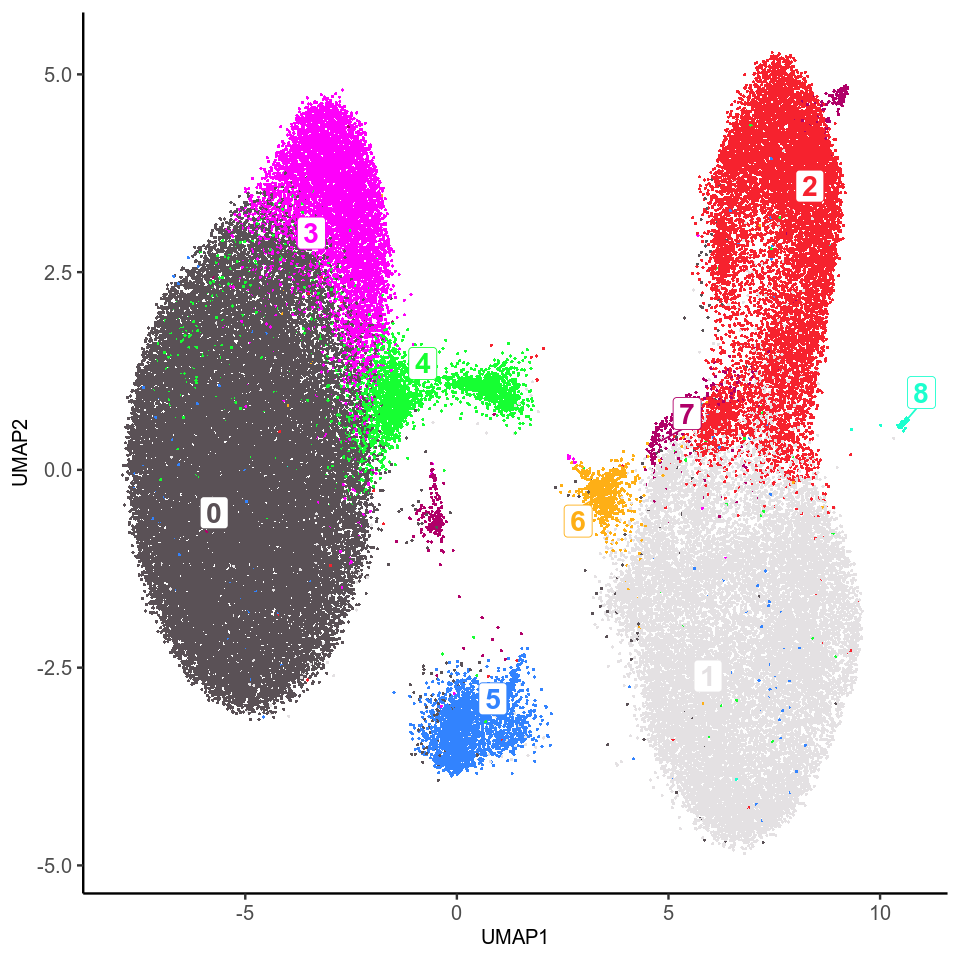

In [85]:
set.seed(71)
options(repr.plot.height = 8, repr.plot.width = 8)

ggplot() +
  geom_point(
    data = qcd_meta[sample(nrow(qcd_meta)), ] %>% select(UMAP_1, UMAP_2, RNA_snn_res.0.25) %>% 
              mutate(RNA_snn_res.0.25 = factor(RNA_snn_res.0.25, levels = seq(0, 12))), 
    aes(x = UMAP_1, y = UMAP_2, color = RNA_snn_res.0.25),
    size = 0.9, stroke = 0.0001,
  ) +
  ggrepel::geom_label_repel(
    data = cluster_center,
    aes(x = UMAP_1, y = UMAP_2, label = as.character(RNA_snn_res.0.25), 
        color = as.character(RNA_snn_res.0.25)),
    size = 6,  fontface = "bold",
    box.padding = unit(0.5, "lines"),
    point.padding = unit(0.01, "lines"),
    show.legend = FALSE
  ) +
    scale_color_manual(values =as.vector(polychrome(26))) +
    theme_classic(base_size = 15) +
  theme(
    legend.position = "none",
          axis.title = element_text(size = 12),
          plot.title = element_text(hjust = 0.5, size = 18, face = "bold")
  ) +
    labs(x = "UMAP1", y = "UMAP2") +
    guides(color = guide_legend(ncol = 1, override.aes = list(size = 8))) 

## CHECK AGAINST CNA

### CASE/CONTROL

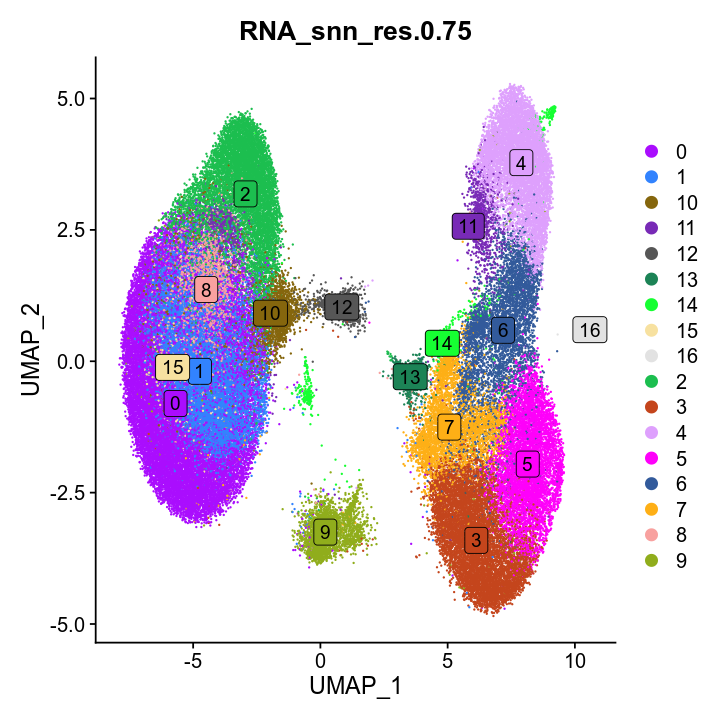

In [73]:
fig.size(6, 6)
DimPlot(all_obj, group.by = 'RNA_snn_res.0.75',
        cols = as.vector(alphabet2(26)),
        label = TRUE, label.box = TRUE)

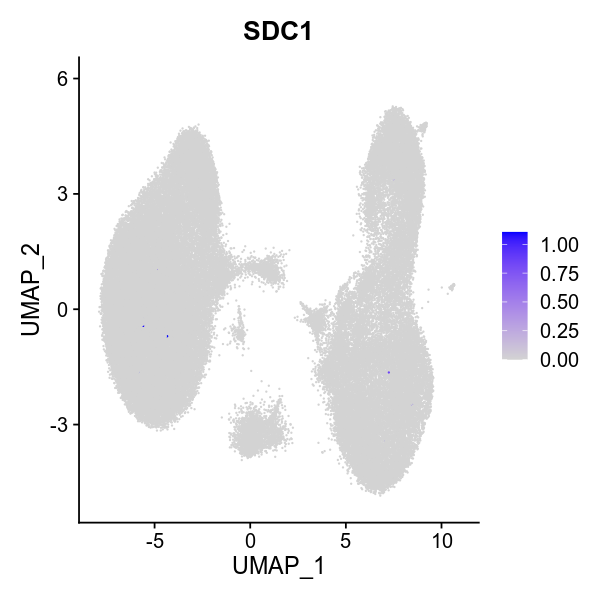

In [35]:
fig.size(5, 5)
FeaturePlot(all_obj, c("SDC1"))

In [10]:
de_res0.25 <- wilcoxauc(all_obj[['RNA']]@data, 
                       all_obj@meta.data$RNA_snn_res.0.25)

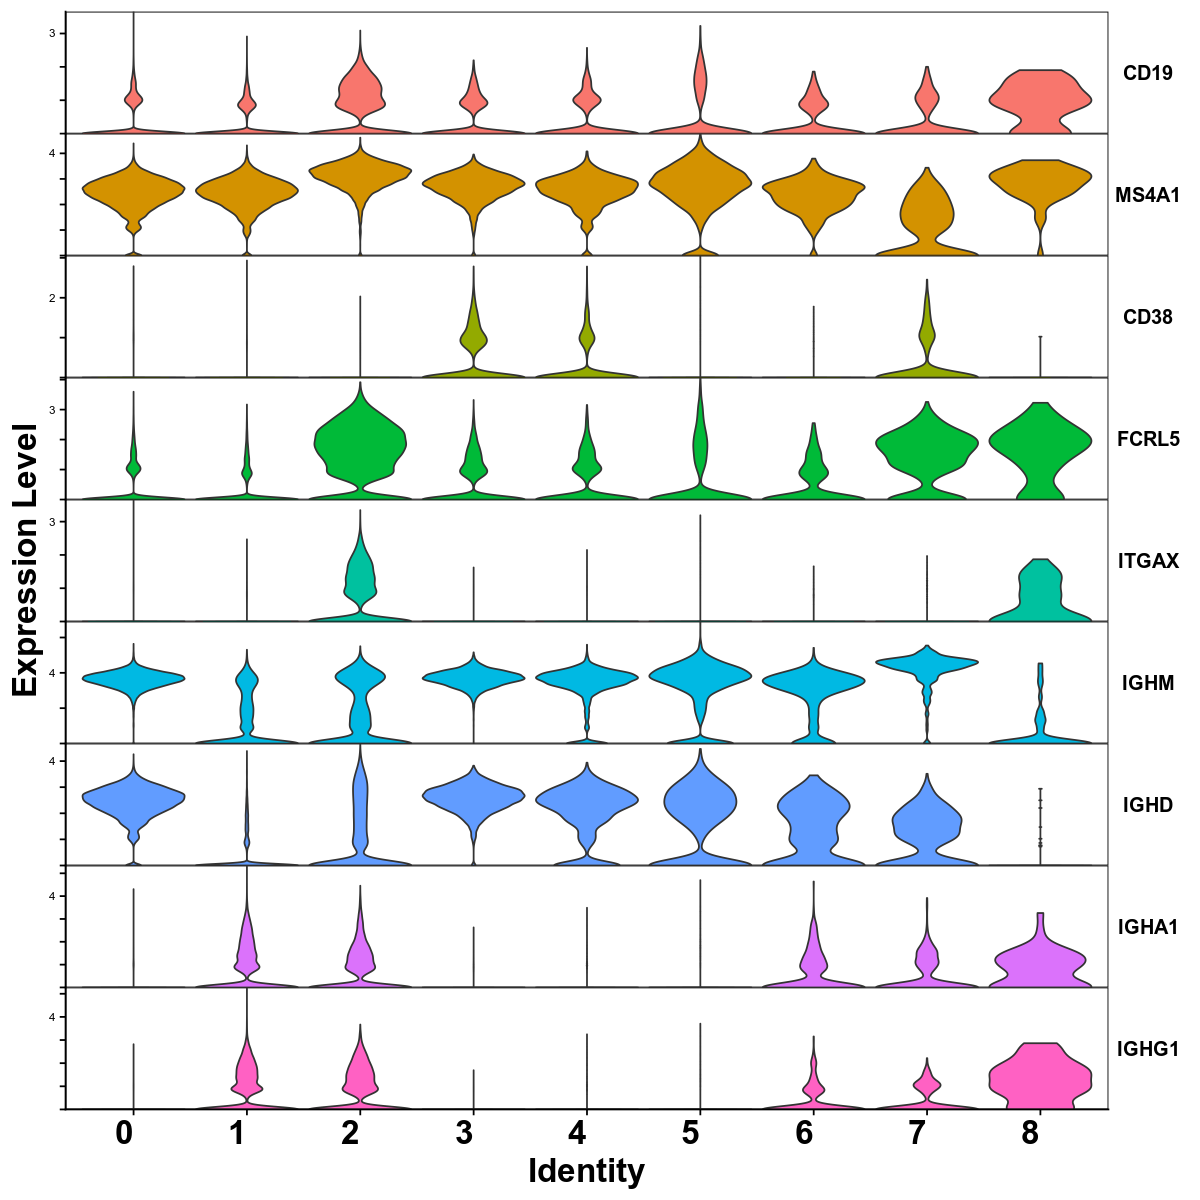

In [31]:
fig.size(10, 10)
VlnPlot(all_obj,  features = c("CD19",
                                "MS4A1",
                                   "CD38",
                                  "FCRL5",
                                  "ITGAX",
                                  "IGHM", 
                                  "IGHD",
                                  "IGHA1",
                                  "IGHG1"), raster = FALSE, flip = TRUE, stack = TRUE, 
        pt.size = 0, group.by = 'RNA_snn_res.0.25') +
    theme(
        legend.position = "none",
        axis.text.x = element_text(color = "black", angle = 0, size = 20, face = "bold"),
        axis.title = element_text(size=20, face = "bold"))

Warning message:
“Removed 3 rows containing non-finite values (`stat_boxplot()`).”


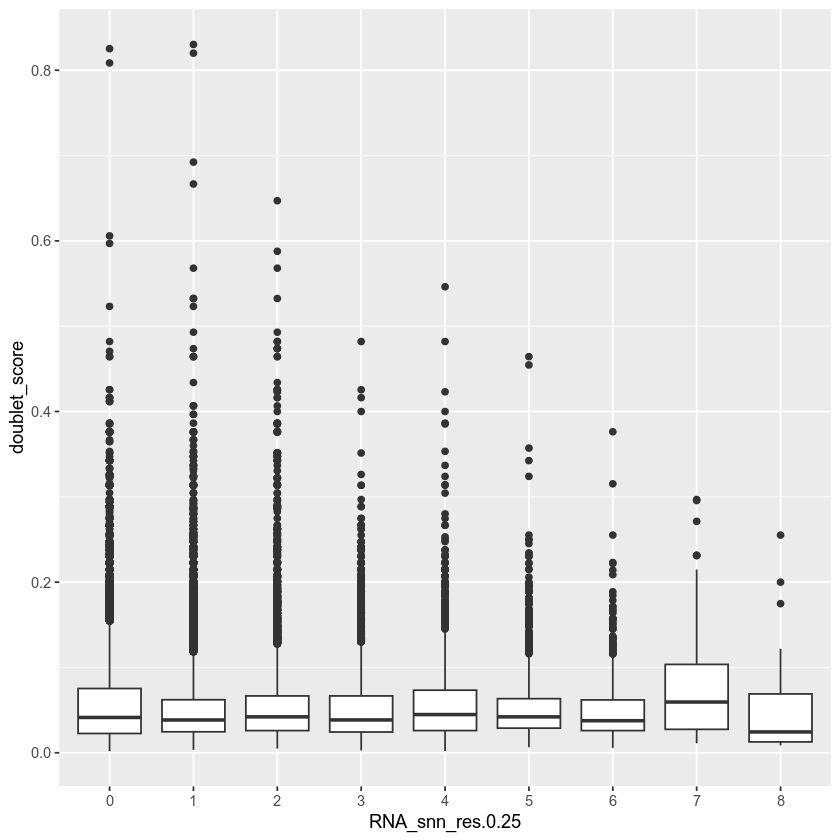

In [17]:
ggplot(all_obj@meta.data, aes(x = RNA_snn_res.0.25, y = doublet_score)) + 
    geom_boxplot()

In [61]:
Idents(all_obj) <- all_obj@meta.data$RNA_snn_res.0.25
cluster4.markers <- FindMarkers(all_obj, ident.1 = 4, min.pct = 0.25)

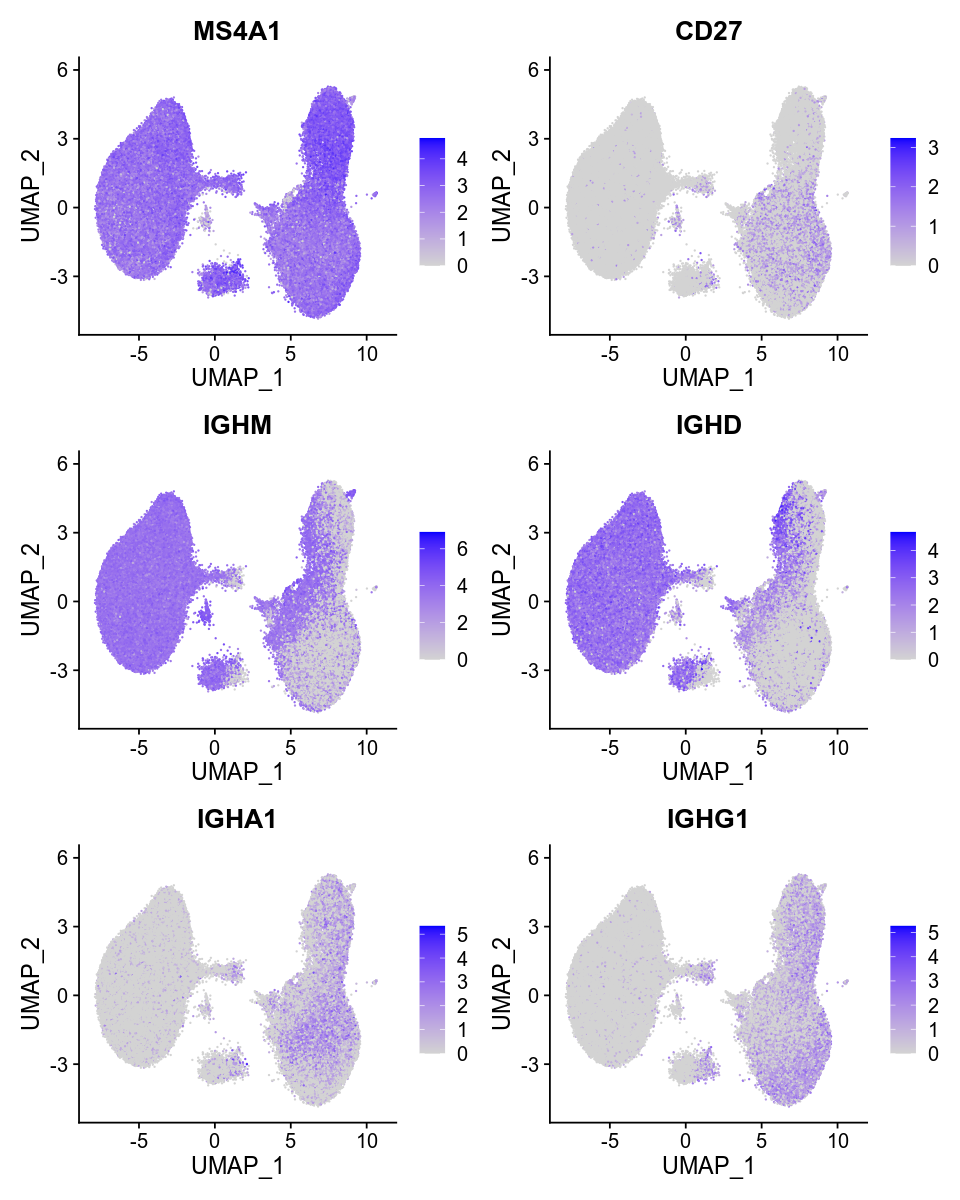

In [15]:
fig.size(10, 8)
FeaturePlot(all_obj,  features = c("MS4A1",
                                   "CD27",
                                  "IGHM", 
                                  "IGHD",
                                  "IGHA1",
                                  "IGHG1"))

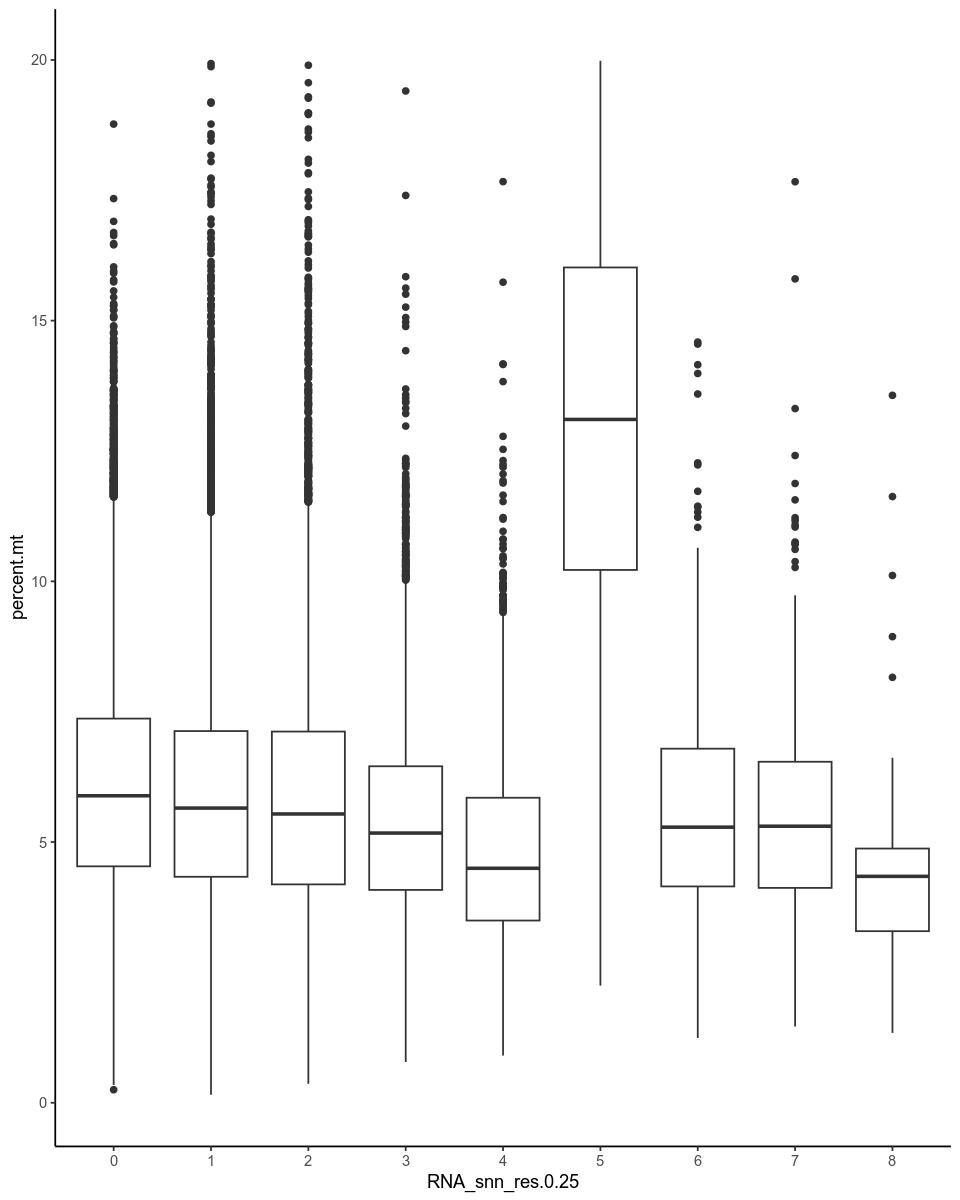

In [12]:
ggplot(all_obj@meta.data, aes(x = RNA_snn_res.0.25, y = percent.mt)) + 
    geom_boxplot() + 
    theme_classic()